In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load data, drop the index column and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:, 1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default'] == 'Yes', 1, 0)
df['student'] = np.where(df['student'] == 'Yes', 1, 0)

# Get names for columns
names = df.columns

# Create a dataframe with the scaled data
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

print(df.head())

    default   student   balance    income
0 -0.185599 -0.645936 -0.218835  0.813187
1 -0.185599  1.548141 -0.037616 -1.605496
2 -0.185599 -0.645936  0.492410 -0.131212
3 -0.185599 -0.645936 -0.632893  0.164031
4 -0.185599 -0.645936 -0.102791  0.370915


In [9]:
# Make new features to capture potential quadratic and cubic relationships
# between the features.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

# Run the model with the new features.
regrBig = linear_model.LinearRegression()
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]
Y_train = df_train['income'].values.reshape(-1, 1)
regrBig.fit(X_train2, Y_train)
print('\nR-squared for Training complex model:')
print(regrBig.score(X_train2, Y_train))


R-squared for Training complex model:
0.5739734452092832


In [8]:
# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3

# Run the model with the new features.
Y_test = df_test['income']
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]
print('\nR-squared for Testing complex model:')
print(regrBig.score(X_test2, Y_test))


R-squared for Testing complex model:
0.5630239527344775


In [52]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregrBig = linear_model.Ridge(alpha=10000, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print('\nR-squared Ridge Regression for Training complex model:')
print(ridgeregrBig.score(X_train2, Y_train))
print('\nR-squared Ridge Regression for Testing complex model:')
print(ridgeregrBig.score(X_test2, Y_test))


R-squared Ridge Regression for Training complex model:
0.3251917396960564

R-squared Ridge Regression for Testing complex model:
0.3188684446811556


In [20]:
lassBig = linear_model.Lasso(alpha=0.35)
lassBig.fit(X_train2, Y_train)
print('\nLasso R² for the model with many features:')
print(lassBig.score(X_train2, Y_train))


Lasso R² for the model with many features:
0.44363376712897057


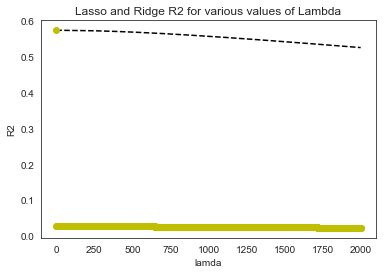

In [61]:
ridgeR2 = []
lassoR2 = []


lambdasize = np.linspace(0,2000,2001)
#Run the model for many alphas.
for lambd in lambdasize:
    # initialize models for each lambda
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    lassBig = linear_model.Lasso(alpha=lambd)
    
    # Fit model for each lambda
    ridgeregrBig.fit(X_train2, Y_train)
    lassBig.fit(X_train2, Y_train)
    
    # Score models and append to respective lists
    ridge_score = ridgeregrBig.score(X_train2, Y_train)
    lasso_score = lassBig.score(X_train2, Y_train)
    
    ridgeR2.append(ridge_score)
    lassoR2.append(lasso_score)

    
plt.plot(lambdasize, ridgeR2, '--k', lambdasize, lassoR2, 'yo')
plt.xlabel('lamda')
plt.ylabel('R2')
plt.title('Lasso and Ridge R2 for various values of Lambda')
plt.show()

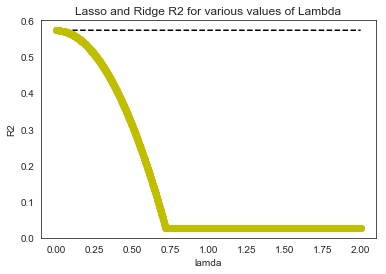

In [56]:
ridgeR2 = []
lassoR2 = []

lambdasize = np.linspace(0,2,2001)
#Run the model for many alphas.
for lambd in lambdasize:
    # initialize models for each lambda
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    lassBig = linear_model.Lasso(alpha=lambd)
    
    # Fit model for each lambda
    ridgeregrBig.fit(X_train2, Y_train)
    lassBig.fit(X_train2, Y_train)
    
    # Score models and append to respective lists
    ridge_score = ridgeregrBig.score(X_train2, Y_train)
    lasso_score = lassBig.score(X_train2, Y_train)
    
    ridgeR2.append(ridge_score)
    lassoR2.append(lasso_score)

    
plt.plot(lambdasize, ridgeR2, '--k', lambdasize, lassoR2, 'yo')
plt.xlabel('lamda')
plt.ylabel('R2')
plt.title('Lasso and Ridge R2 for various values of Lambda')
plt.show()

In [57]:
# look at when lambda = 0 exclusively
# initialize models for each lambda
ridgeregrBig = linear_model.Ridge(alpha=0, fit_intercept=False)
lassBig = linear_model.Lasso(alpha=0)
    
# Fit model for each lambda
ridgeregrBig.fit(X_train2, Y_train)
lassBig.fit(X_train2, Y_train)
    
# Score models and append to respective lists
ridge_score = ridgeregrBig.score(X_train2, Y_train)
lasso_score = lassBig.score(X_train2, Y_train)

print('\Ridge R² for the model with many features:')
print(ridge_score)
print('\nLasso R² for the model with many features:')
print(lasso_score)

\Ridge R² for the model with many features:
0.5739733101704144

Lasso R² for the model with many features:
0.5739444483155421


The only time Lasso and Ridge yield the same$R^2$ is when lambda = 0.  The ridge model doesn't begin to change much until lambda values gets somewhere around 1000; whereas, for the lasso model we see that as soon as lambda hits 0.75 the model is effectively useless.  This is because the lasso model is setting all parameters to 0.